# Phenotype Simulation

### Phenotype simulation equation
The simulation is based on the equation:

  $$y = a X \cdot W_{eas} + b X \cdot W_{eur} + \varepsilon$$

where
- $y$ is the phenotype vector that contains the simulated phenotype for each individual.
- $X$ is the genotype vector where the rows represent the individuals, the column represent variants, and each entry is the allele count for that individual at that variant.
- $W_{eas}$ and $W_{eur}$ are the vectors of coefficients for variants for the East Asian and the European genotype vectors respectively, where each entry is the effect size of each variant.
- $a$ is the weight parameter for the East Asian genotype vector and is set as 0.9.
- $b$ is the weight parameter for the European genotype vector and set as 0.1.
- &#949; is the non-genetic component that contributes to complex diseases.

### Inputs
1. genotopye vector ($X$): genotype_vector
3. coefficient vector for EAS population ($W_{eas}$): W_eas
4. coefficient vector for EUR population ($W_{eur}$ ): W_eur

### Outputs
1. simulated phenotype vector ($y''$): simulated_phenotype_vector
2. the validation dataset for genotypes: genotype_vali
3. the test dataset for genotypes: genotype_test
4. the validation dataset for phenotypes: phenotype_vali
5. the test dataset for phenotypes: phenotype_test

### Import Python packages:

In [131]:
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from mpmath import mp

### Set the current working directory:

In [147]:
# Check current working directory - should be the scripts folder
cwd = os.getcwd()
print(f"Current working directory: {cwd}")

# Obtain the phenotype simulation folder path
pheno_simu_dir = os.path.dirname(cwd)
print(f"Phenotype simulation directory: {pheno_simu_dir}")

Current working directory: /Users/aliceyan/Documents/GitHub/prs-csx-workshop-tutorial-updated-12032024/phenotype_simulation/scripts
Phenotype simulation directory: /Users/aliceyan/Documents/GitHub/prs-csx-workshop-tutorial-updated-12032024/phenotype_simulation


### Set parameters

In [149]:
# set parameters
a = 0.9
b = 0.1

### Obtain inputs
#### Read in the genotype info

In [151]:
X = pd.read_csv(pheno_simu_dir + "/inputs" + "/genotype_vector", delim_whitespace=True)
print(f"{X.shape = }")
print(f"X[:10]:\n{X[:10]}")

X.shape = (504, 902)
X[:10]:
    PID  rs9605903_T  rs5746647_G  rs5747999_C  rs2845380_A  rs2247281_G  \
0  P001            2            0            0            0            2   
1  P002            2            0            1            0            1   
2  P003            1            0            2            0            1   
3  P004            2            0            0            0            1   
4  P005            2            0            1            0            0   
5  P006            2            0            1            0            1   
6  P007            2            0            1            1            2   
7  P008            2            0            1            1            2   
8  P009            1            0            0            1            1   
9  P010            2            0            1            0            1   

   rs2845346_C  rs2845347_C  rs1807512_T  rs5748593_T  ...  rs4546089_G  \
0            0            0            2            0  ... 

/var/folders/t6/t9hwvlmd445d7j4nxs521f6h0000gq/T/ipykernel_43034/2043327107.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X = pd.read_csv(pheno_simu_dir + "/inputs" + "/genotype_vector", delim_whitespace=True)


#### Read in coefficient vectors for both populations

In [153]:
W_eas = np.loadtxt(pheno_simu_dir + "/inputs" + "/W_eas", delimiter="\t")
W_eur = np.loadtxt(pheno_simu_dir + "/inputs" + "/W_eur", delimiter="\t")
print(f"{W_eas.shape = }")
print(f"{W_eur.shape = }")
print(f"W_eur[:10]:\n {W_eur[:10]}")
print(f"W_eas[:10]:\n {W_eas[:10]}")

W_eas.shape = (901,)
W_eur.shape = (901,)
W_eur[:10]:
 [ 4.900701e-04 -3.056023e-04 -2.424804e-04  2.930826e-04  3.415466e-04
  1.967975e-04  3.136570e-04 -8.778890e-04  3.581402e-04  4.915989e-05]
W_eas[:10]:
 [ 9.712722e-04 -7.812051e-04 -1.492431e-04  5.639565e-04  6.782739e-04
  1.080665e-03  9.390400e-04 -2.454383e-03  7.731214e-04  9.410831e-05]


### Set the initial phenotype vector

In [156]:
y = a * (X.iloc[:, 1:]).dot(W_eas) + b * (X.iloc[:, 1:]).dot(W_eur)

### Conduct no-standardization simulation:

In [158]:
# no standardization simulation
mean_y = y.mean()
std_y = y.std()
std_envi = std_y
np.random.seed(144)
epsilon_nonstd = np.random.normal(loc = 0, scale = std_envi, size = y.shape)
simulated_y = y + epsilon_nonstd

# add identifier column (P001 to P504)
simulated_y = simulated_y.to_frame()
num_rows = simulated_y.shape[0]
pids = [f"P{str(i).zfill(3)}" for i in range(1, num_rows + 1)]
simulated_y.insert(0, "PID", pids)
simulated_y.rename(columns={simulated_y.columns[1]: "phen"}, inplace=True)

print(f"simulated_y:\n{simulated_y}")
simulated_y.to_csv(pheno_simu_dir + "/outputs/simulated_phenotype_vector", sep='\t', index=False)

simulated_y:
      PID      phen
0    P001  0.027971
1    P002  0.066798
2    P003  0.058801
3    P004  0.113289
4    P005  0.115960
..    ...       ...
499  P500  0.016631
500  P501  0.085134
501  P502  0.054917
502  P503  0.051367
503  P504  0.075223

[504 rows x 2 columns]


### Plot no-standardization simulation

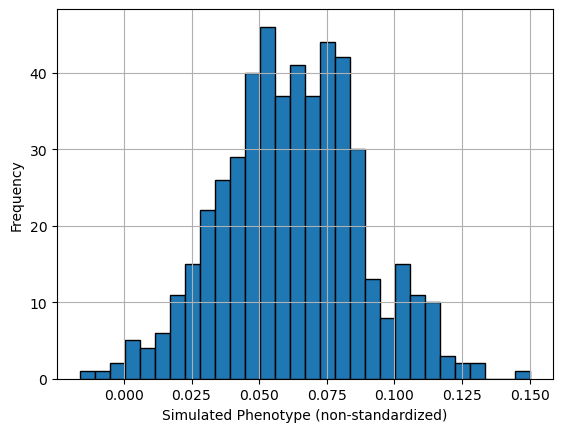

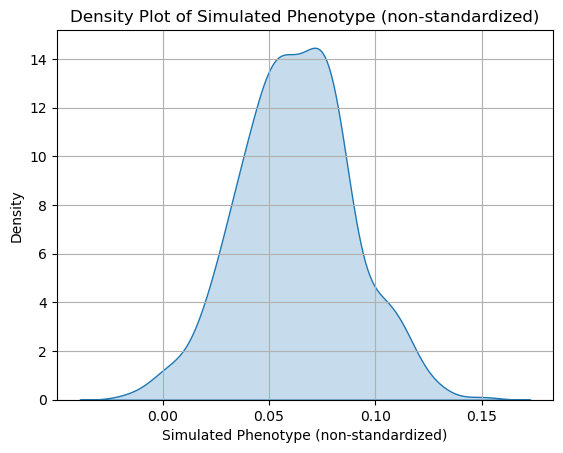

In [160]:
plt.figure()
plt.hist(simulated_y_phen_only, bins = 30, edgecolor = 'k')
plt.xlabel('Simulated Phenotype (non-standardized)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure()
sns.kdeplot(simulated_y_phen_only, fill=True)
plt.title('Density Plot of Simulated Phenotype (non-standardized)')
plt.xlabel('Simulated Phenotype (non-standardized)')
plt.grid(True)
plt.show()

### Split validation and test dataset

In [201]:
# Set the random seed for reproducibility
np.random.seed(164)

# Shuffle the list
np.random.shuffle(pids)

# Split into validation and test datasets
pids_vali = pids[:201]  # First 201 items for validation
pids_test = pids[201:]  # Remaining items for test

X_vali = X[X['PID'].isin(pids_vali)].iloc[:, 1:]
X_test = X[X['PID'].isin(pids_test)].iloc[:, 1:]

y_vali = simulated_y[simulated_y['PID'].isin(pids_vali)].iloc[:, 1:]
y_test = simulated_y[simulated_y['PID'].isin(pids_test)].iloc[:, 1:]

# Inspect data
print(f"X_vali.shape: {X_vali.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_vali.shape: {simulated_y_vali.shape}")
print(f"y_test.shape: {simulated_y_test.shape}")

print(f"X_vali[:5]:\n {X_vali[:5]}")
print(f"simulated_y_vali[:5]:\n {simulated_y_vali[:5]}")

# Save data
np.savetxt(pheno_simu_dir + "/outputs/genotype_vali.tsv", X_vali, fmt="%.10f", delimiter="\t")
np.savetxt(pheno_simu_dir + "/outputs/genotype_test.tsv", X_test, fmt="%.10f", delimiter="\t")
np.savetxt(pheno_simu_dir + "/outputs/phenotype_vali.tsv", y_vali, fmt="%.10f", delimiter="\t")
np.savetxt(pheno_simu_dir + "/outputs/phenotype_test.tsv", y_test, fmt="%.10f", delimiter="\t")

X_vali.shape: (201, 901)
X_test.shape: (303, 901)
y_vali.shape: (201, 1)
y_test.shape: (303, 1)
X_vali[:5]:
     rs9605903_T  rs5746647_G  rs5747999_C  rs2845380_A  rs2247281_G  \
1             2            0            1            0            1   
6             2            0            1            1            2   
9             2            0            1            0            1   
13            2            0            1            1            2   
17            2            0            2            0            1   

    rs2845346_C  rs2845347_C  rs1807512_T  rs5748593_T  rs9606468_T  ...  \
1             0            0            2            1            2  ...   
6             0            0            2            0            2  ...   
9             0            0            2            0            2  ...   
13            0            0            2            0            2  ...   
17            0            0            2            0            2  ...   

    rs4

### Regression Analysis on Validation Dataset

In [203]:
# Prepare the model input
X_XWeas_vali = X_vali.values.dot(W_eas).flatten()
X_XWeur_vali = X_vali.values.dot(W_eur).flatten()
X_mix = np.column_stack((X_XWeas_vali, X_XWeur_vali))

In [205]:
# Fit the model/Run linear regression
model = LinearRegression()
model.fit(X_mix, y_vali)

LinearRegression()

In [209]:
model.coef_

array([[0.89897269, 0.36216596]])

In [215]:
# Obtain the regression parameters
a_hat = model.coef_[0][0]
b_hat = model.coef_[0][1]
intercept = model.intercept_[0]
print(f"{a_hat = }")
print(f"{b_hat = }")
print(f"{intercept = }")

a_hat = 0.8989726940222849
b_hat = 0.36216595775170946
intercept = -0.022608874166172035


### Predicting Heights for Test Dataset

In [219]:
X_XWeas_test = X_test.values.dot(W_eas).flatten()
X_XWeur_test = X_test.values.dot(W_eur).flatten()
y_hat = a_hat * X_XWeas_test + b_hat * X_XWeur_test + intercept

### Evaluation based on the pearson correlation coefficient on the testing cohort

In [235]:
print("y_hat values:", y_hat[:10])
print("y_test values:", y_test["phen"].values[:10])

r_value, p_value = pearsonr(y_hat, y_test["phen"].values)
print(f"{r_value =}")
print(f"{p_value =}")

y_hat values: [0.04695375 0.05655279 0.08438821 0.0970568  0.03853903 0.05887181
 0.04240254 0.00238118 0.07671237 0.06508254]
y_test values: [0.02797135 0.05880101 0.1132894  0.11596031 0.03878745 0.0766022
 0.03272136 0.00585905 0.08917236 0.03387937]
r_value =0.7190838098766887
p_value =1.6873219734615086e-49


In [237]:
# Set the precision to a high value
mp.dps = 50  # Decimal places of precision

# Compute Pearson correlation
r_value, p_value = pearsonr(y_hat, y_test["phen"].values)

# Convert p-value to high precision using mpmath
p_value_precise = mp.mpf(p_value)

# Print the r_value and precise p_value
print(f"r_value = {r_value}")
print(f"p_value = {p_value_precise}")

r_value = 0.7190838098766887
p_value = 1.6873219734615085751861074209574647659681990647969e-49


In [239]:
r2 = r2_score(y_test["phen"].values, y_hat)
print(f"{r2 = }")

r2 = 0.4944395143267716
